# 이미지 인식의 꽃, CNN

# mnist 숫자 분류, 기본 CNN 구현

## mnist 데이터 분석

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import sys

In [161]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [162]:
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


In [163]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

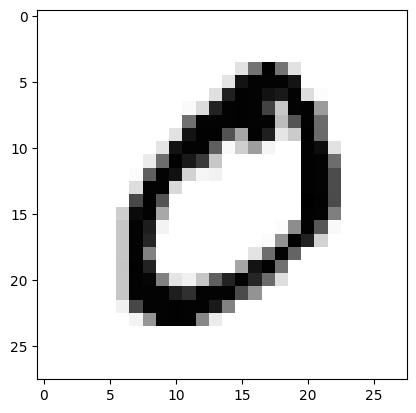

In [164]:
plt.imshow(X_train[1], cmap='Greys')
plt.show()

- 글씨 데이터 확인

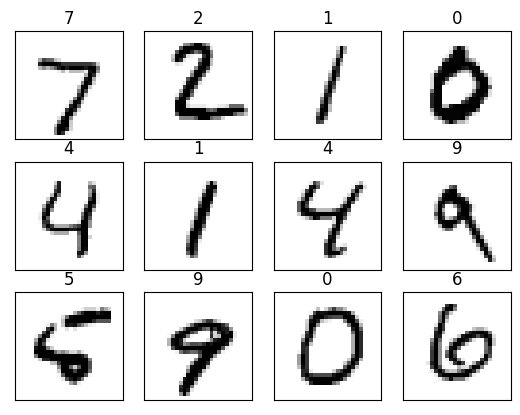

In [165]:
fig = plt.figure()  
for i in range(1, 13): 
    # 2x2 블록 영역의 i 위치(1부터 시작)
    subplot = fig.add_subplot(3, 4, i)
    # x,y축 지점 표시 안함
    subplot.set_xticks([])
    subplot.set_yticks([])
    # subplot 제목
    subplot.set_title('%i' % y_test[i-1])   # ('image %i' % i)
    # 입력으로 사용한 테스트 이미지를 28x28 구조로 재배열하고

    # 그레이스케일 이미지 출력
    subplot.imshow(X_test[i-1].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

# CNN 신경망 구조 실행

## 필요 라이브러리 로딩

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


## 데이터 준비

In [173]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [174]:
X_train.shape

(60000, 28, 28, 1)

## CNN 모델 정의

In [177]:
del CNN_model

In [178]:
CNN_model = Sequential()
CNN_model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 32x3x3+32=320
CNN_model.add(Conv2D(64, (4,4), activation='relu'))  # parameter 갯수 : 64x4x4x32+64 =32832 
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10, activation='softmax'))
CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               991360    
                                                      

## 모델의 실행 옵션 설정

In [179]:
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 모델 최적화를 위한 설정

In [180]:
# best 모델 저장 설정
#modelpath = '/content/drive/MyDrive/KFQ_kdigital/강의ppt/3.딥러닝/exam/data/model/ch16-mnist_cnn.hdf5'
modelpath = './models/ch14-mnist_cnn_best.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 모델 실행

In [181]:
history = CNN_model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200,  \
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 0.2577 - accuracy: 0.9199
Epoch 1: val_loss improved from inf to 0.07027, saving model to ./models\ch14-mnist_cnn_best.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 0.2577 - accuracy: 0.9199 - val_loss: 0.0703 - val_accuracy: 0.9793
Epoch 2/30
222/225 [============================>.] - ETA: 0s - loss: 0.0668 - accuracy: 0.9797
Epoch 2: val_loss improved from 0.07027 to 0.05099, saving model to ./models\ch14-mnist_cnn_best.hdf5
225/225 [==============================] - 3s 11ms/step - loss: 0.0666 - accuracy: 0.9797 - val_loss: 0.0510 - val_accuracy: 0.9851
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.9853
Epoch 3: val_loss improved from 0.05099 to 0.04527, saving model to ./models\ch14-mnist_cnn_best.hdf5
225/225 [==============================] - 3s 11ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 4/30
223

## 테스트 정확도

In [80]:
print("Test Accuracy: %.4f" % (CNN_model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


313/313 [==============================] - 1s 3ms/step - loss: 0.0337 - accuracy: 0.9924
Test Accuracy: 0.9924


## 그래프 그리기

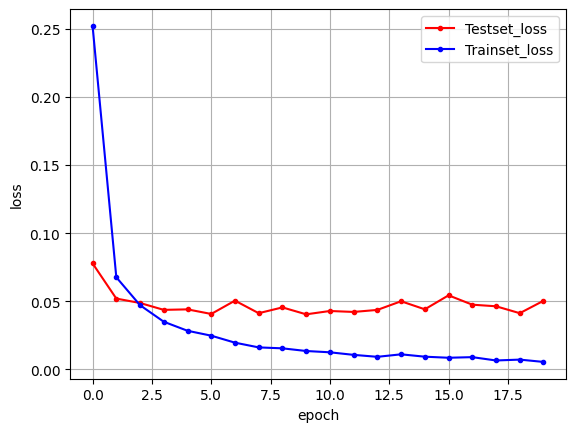

In [81]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker=".", c="blue", label='Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


# 내가쓴 손글씨로 테스트

In [107]:
import numpy as np
from PIL import Image

In [127]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, './data_num/my_num2.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

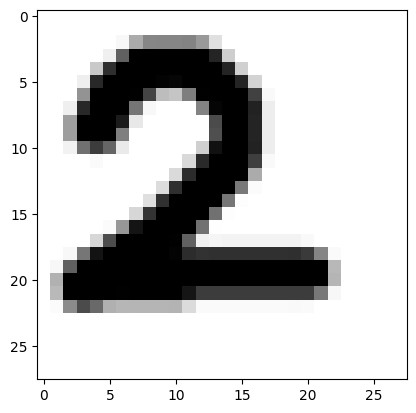

In [128]:
# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass

# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')

In [129]:
image = ((image / 255.) - 1) * -1

test_data2 = np.reshape(image, (1, 28, 28))

In [130]:
# 모델 예측
# shape을 변경하여 학습된 model에 넣고 결과 확인

print(CNN_model.predict(test_data2))
print("모델의 예측값 : ", np.argmax(CNN_model.predict(test_data2)))

1/1 [==============================] - 0s 12ms/step
[[2.5270776e-14 1.3160735e-11 1.0000000e+00 1.1636692e-13 2.1348556e-17
  1.6260628e-20 1.1704801e-14 2.4274927e-17 2.1669718e-15 5.3633724e-21]]
1/1 [==============================] - 0s 11ms/step
모델의 예측값 :  2


# best model loading

In [131]:
from tensorflow.keras.models import load_model
modelpath = './models/ch14-mnist_cnn_best.hdf5'
loaded_model = load_model(modelpath)

In [132]:
print(loaded_model.predict(test_data2))
print("모델의 예측값 : ", np.argmax(loaded_model.predict(test_data2)))

1/1 [==============================] - 0s 41ms/step
[[1.8018691e-08 3.6797957e-07 9.9999964e-01 4.0370139e-08 7.9536394e-10
  1.3857714e-12 4.1176580e-08 1.2912563e-10 3.6784256e-10 1.0149664e-12]]
1/1 [==============================] - 0s 12ms/step
모델의 예측값 :  2
